In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = '/Users/fbickfordsmith/Google Drive/Project/'
df0 = pd.read_csv(path+'attention/contexts/diffcontexts_stats.csv', index_col=0)
df0.head(5)

,wnids,num_examples,num_correct,incontext_acc,outofcontext_acc
0,"['n11939491', 'n13044778', 'n12057211', 'n0202...",2416,2279,0.943295,0.630854
1,"['n02606052', 'n01518878', 'n03888257', 'n0238...",2422,2171,0.896367,0.633294
2,"['n12267677', 'n02422106', 'n02417914', 'n0433...",2416,2067,0.855546,0.635481
3,"['n02128757', 'n02447366', 'n01531178', 'n0248...",2445,2024,0.827812,0.636822
4,"['n02110806', 'n02074367', 'n02051845', 'n0170...",2393,1912,0.798997,0.638543


In [3]:
df1 = pd.read_csv(path+'attention/results/diffcontexts_trained_metrics.csv', index_col=0)
df1.head(5)

,incontext_loss,incontext_acc,incontext_top_k_categorical_accuracy,outofcontext_loss,outofcontext_acc,outofcontext_top_k_categorical_accuracy,alldata_loss,alldata_acc,alldata_top_k_categorical_accuracy
0,0.295810,0.945364,0.977235,1.555920,0.630808,0.851078,1.491493,0.646876,0.857540
1,0.440089,0.902560,0.964905,1.548336,0.632572,0.851595,1.491496,0.646420,0.857415
2,0.610536,0.860513,0.947020,1.537564,0.634963,0.852537,1.489797,0.646586,0.857415
3,0.644338,0.851125,0.944785,1.538662,0.635266,0.852928,1.492434,0.646420,0.857685
4,0.832869,0.810698,0.928542,1.519773,0.638745,0.854211,1.484036,0.647684,0.858079


In [4]:
df2 = pd.DataFrame()
df2['x'] = df0['incontext_acc']
df2['y_in'] = df1['incontext_acc'] - df0['incontext_acc']
df2['y_out'] = df1['outofcontext_acc'] - df0['outofcontext_acc']
df2.sort_values(by='x', inplace=True)

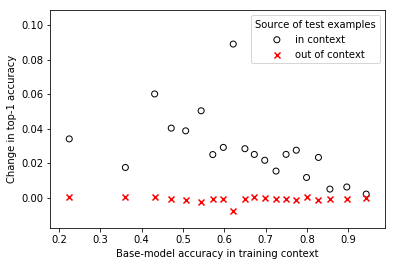

In [21]:
plt.scatter(df2['x'], df2['y_in'], label='in context', marker='o', facecolors='none', edgecolors='k')
plt.scatter(df2['x'], df2['y_out'], label='out of context', c='r', marker='x')
plt.xlabel('Base-model accuracy in training context')
plt.ylabel('Change in top-1 accuracy')
plt.legend(title='Source of test examples')
plt.savefig('diffcontexts_acc_change_br.png', dpi=600)
plt.show()

In [16]:
path_training = '/Users/fbickfordsmith/Google Drive/Project/attention/training/'
num_epochs = [len(pd.read_csv(path_training+f'diffcontext{i:02}_training.csv', index_col=0)) for i in range(20)]
num_epochs

[3, 2, 2, 6, 2, 5, 4, 2, 3, 3, 3, 10, 3, 3, 5, 4, 4, 5, 2, 3]

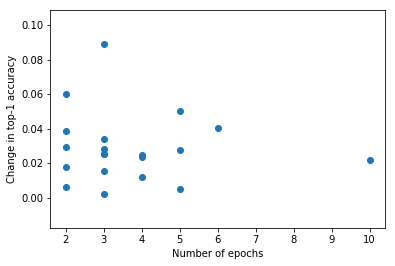

In [17]:
plt.scatter(num_epochs, df2['y_in'])
plt.xlabel('Number of epochs')
plt.ylabel('Change in top-1 accuracy')
plt.show()